<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Natural%20Language%20Processing%20with%20Sequence%20Models/W1_nn_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network for Sentiment Analysis

## Neural Network for Sentiment Analysis
### Outline
- Neural Networks and Forward propagation
- Structure for sentiment analysis

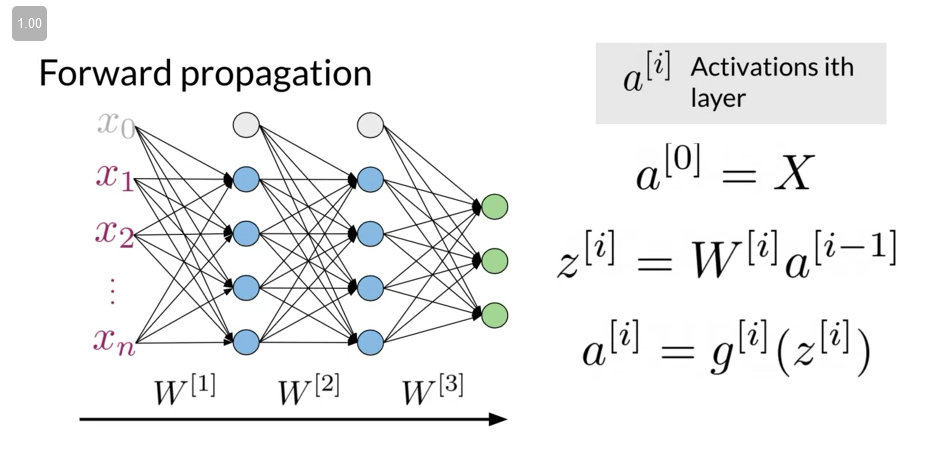

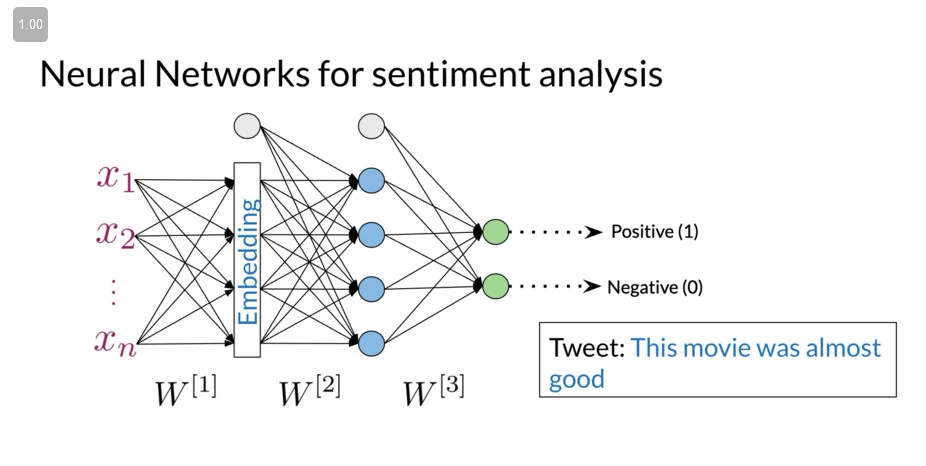

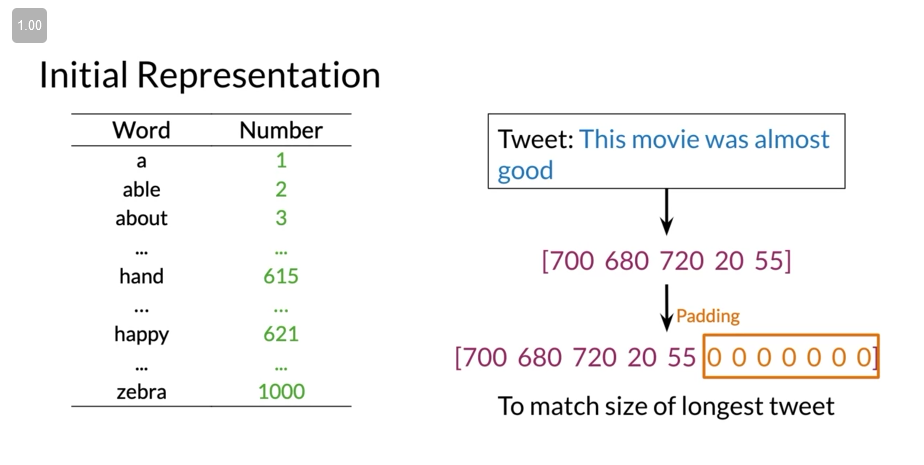

### Summary
- Structure for sentiment analysis
- Classify complex tweets
- Initial representation

In [2]:
# SECTION DIVIDER

## Trax: Neural Network
### Outline
- Define a basic neural network using Trax
- Benefits of Trax

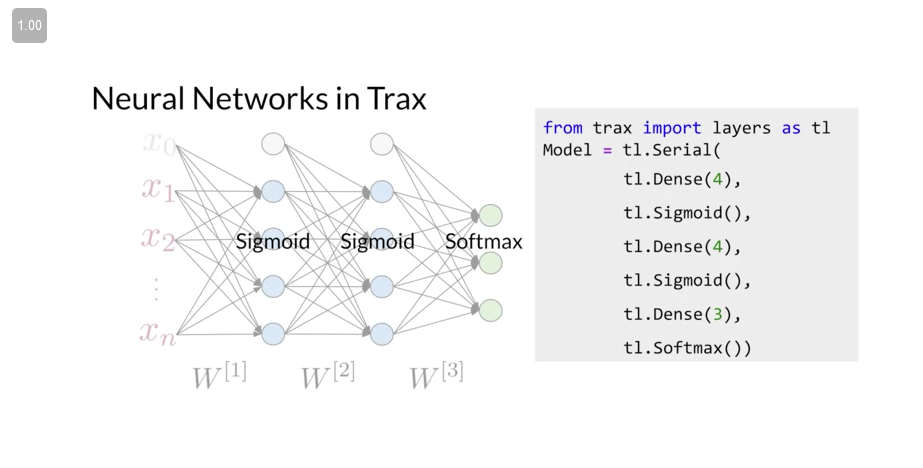

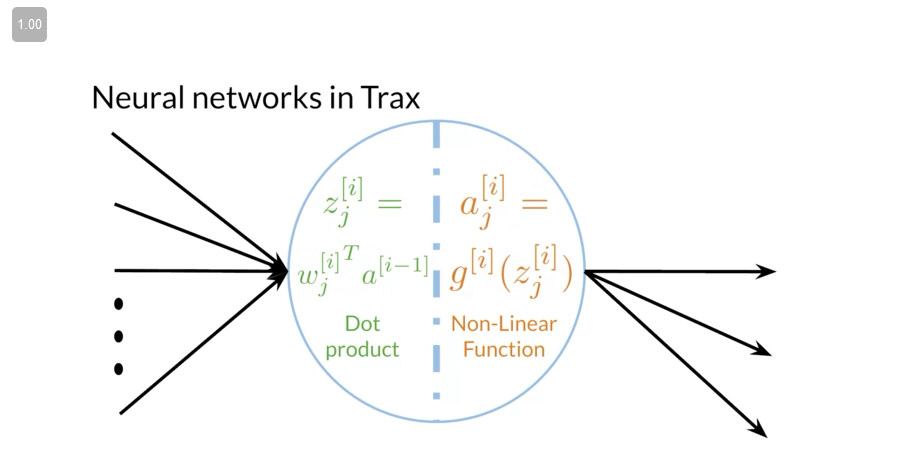

### Advantages of using frameworks
- Run fast on CPUs, GPUs and TPUs
- Parallel computing
- Record algebraic computations for gradient evaluation

Tensorflow - PyTorch - Jax

### Summary
- Order of computation -> Model in Trax
- Benefits from using frameworks

In [3]:
# SECTION DIVIDER

## Why we recommend Trax
Trax: Deep Learning with Clear Code and Speed

### Why do you want from a deep learning library?
- Makes programmers efficient
- Runs code fast

| Device  | Type        | Price (on-demand) | Price (preemptible) |
|---------|-------------|-------------------|---------------------|
| GPU     | 8x V100     | \$19.84 \/ hour   | \$5.92 \/ hour      |
| TPU     | 8x v3       | \$8 \/ hour       | \$1.40 \/ hour      |

### Trax makes programmers efficient
- Bottom-up clean re-design
- Easy to debug, you can read the code
- Full models with dataset bindings included
- Main models regression-tested daily

Is there a price to pay?
- Backward compatibility

### Trax runs code fast
- Designed to use a JIT compiler with JAX and XLA
- JAX: fastest Transformer in MLPerf 2020 (JAX: 0.26, TF: 0.35, pyTorch: 0.62)
- No code changes at all between CPU, GPU, and TPU, preemptible training
- Tested with TPUs on colab too:

### Trax and JAX, docs and code
- Official Trax documentation maintained by the Google Brain team: https://trax-ml.readthedocs.io/en/latest/
- Trax source code on GitHub: https://github.com/google/trax
- JAX library: https://jax.readthedocs.io/en/latest/index.html

In [4]:
# SECTION DIVIDER

## Trax Code

In [5]:
!pip install trax

from IPython.display import clear_output
clear_output(wait=False)

!pip list | grep trax

trax                             1.4.1


In [6]:
import numpy as np

from trax import layers as tl
from trax import shapes
from trax import fastmath

In [7]:
# Create a relu trax layer
relu = tl.Relu()
print(f"Name: {relu.name}, Expected inputs: {relu.n_in}, Promised outputs: {relu.n_out}")

x = np.array([-2, -1, 0, 1, 2])
y = relu(x)
print(f"Relu outputs: {y}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Name: Serial, Expected inputs: 1, Promised outputs: 1
Relu outputs: [0 0 0 1 2]


In [8]:
# Create a concatenate trax layer
concat = tl.Concatenate()
print(f"Name: {concat.name}, Expected inputs: {concat.n_in}, Promised outputs: {concat.n_out}")

x1 = np.array([-10, -20, -30])
x2 = x1 / -10
y = concat([x1, x2])
print(f"Concat outputs: {y}")

Name: Concatenate, Expected inputs: 2, Promised outputs: 1
Concat outputs: [-10. -20. -30.   1.   2.   3.]


In [9]:
# Configure a concatenate layer
concat_3 = tl.Concatenate(n_items=3)
print(f"Name: {concat_3.name}, Expected inputs: {concat_3.n_in}, Promised outputs: {concat_3.n_out}")

x1 = np.array([-10, -20, -30])
x2 = x1 / -10
x3 = x2 * 0.99
y = concat_3([x1, x2, x3])
print(f"Concat outputs: {y}")

Name: Concatenate, Expected inputs: 3, Promised outputs: 1
Concat outputs: [-10.   -20.   -30.     1.     2.     3.     0.99   1.98   2.97]


In [10]:
# Function helper, to see docstring with explanation
# help(tl.Concatenate)
# help(tl.LayerNorm)
# help(shapes.signature)

In [11]:
# Layer initialization
norm = tl.LayerNorm()

x = np.array([0, 1, 2, 3], dtype="float")

norm.init(shapes.signature(x))
y = norm(x)

print(f"Normal shape: {x.shape}, Data type: {type(x.shape)}")
print(f"Shape trax: {shapes.signature(x)}, Data type: {type(shapes.signature(x))}")
print()
print(f"Name: {norm.name}, Expected inputs: {norm.n_in}, Promised outputs: {norm.n_out}")
print(f"Weights: {norm.weights[0]}, Biases: {norm.weights[1]}")
print()
print(f"Norm outputs: {y}")

Normal shape: (4,), Data type: <class 'tuple'>
Shape trax: ShapeDtype{shape:(4,), dtype:float64}, Data type: <class 'trax.shapes.ShapeDtype'>

Name: LayerNorm, Expected inputs: 1, Promised outputs: 1
Weights: [1. 1. 1. 1.], Biases: [0. 0. 0. 0.]

Norm outputs: [-1.3416404  -0.44721344  0.44721344  1.3416404 ]


/usr/local/lib/python3.10/dist-packages/trax/layers/normalization.py:141: UserWarning: Explicitly requested dtype float64 requested in ones is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  scale = jnp.ones(features, dtype=input_signature.dtype)
/usr/local/lib/python3.10/dist-packages/trax/layers/normalization.py:142: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  bias = jnp.zeros(features, dtype=input_signature.dtype)


In [12]:
# help(tl.Fn)

In [13]:
# Define a custom layer
def TimesTwo():
  layer_name = "TimesTwo"

  def func(x):
    return x * 2

  return tl.Fn(layer_name, func)

times_two = TimesTwo()
print(f"Name: {times_two.name}, Expected inputs: {times_two.n_in}, Promised outputs: {times_two.n_out}")

x = np.array([1, 2, 3])
y = times_two(x)
print(f"TimesTwo outputs: {y}")

Name: TimesTwo, Expected inputs: 1, Promised outputs: 1
TimesTwo outputs: [2 4 6]


In [14]:
# help(tl.Serial)
# help(tl.Parallel)

In [15]:
# Serial combinator
serial = tl.Serial(
    tl.LayerNorm(),
    tl.Relu(),
    times_two
)

x = np.array([-2, -1, 0, 1, 2])
serial.init(shapes.signature(x)) # initialising serial instance
y = serial(x)

print(f"Serial Model:\n {serial}")
print()
print(f"Name: {serial.name}, Expected inputs: {serial.n_in}, Promised outpus: {serial.n_out}")
print(f"Serial outputs: {y}")

/usr/local/lib/python3.10/dist-packages/trax/layers/normalization.py:141: UserWarning: Explicitly requested dtype int64 requested in ones is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  scale = jnp.ones(features, dtype=input_signature.dtype)
/usr/local/lib/python3.10/dist-packages/trax/layers/normalization.py:142: UserWarning: Explicitly requested dtype int64 requested in zeros is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  bias = jnp.zeros(features, dtype=input_signature.dtype)


Serial Model:
 Serial[
  LayerNorm
  Serial[
    Relu
  ]
  TimesTwo
]

Name: Serial, Expected inputs: 1, Promised outpus: 1
Serial outputs: [0.        0.        0.        1.4142132 2.8284264]


In [16]:
# Numpy vs fastmath.numpy have different data types
x_numpy = np.array([1, 2, 3])
x_jax = fastmath.numpy.array([1, 2, 3])

print(f"Good old numpy: {type(x_numpy)}, Jax trax numpy: {type(x_jax)}")

Good old numpy: <class 'numpy.ndarray'>, Jax trax numpy: <class 'jaxlib.xla_extension.ArrayImpl'>


In [17]:
# SECTION DIVIDER

## Classes, subclasses, and inheritance
### Outline
- How classes work and their implementation
- Subclasses and inheritance

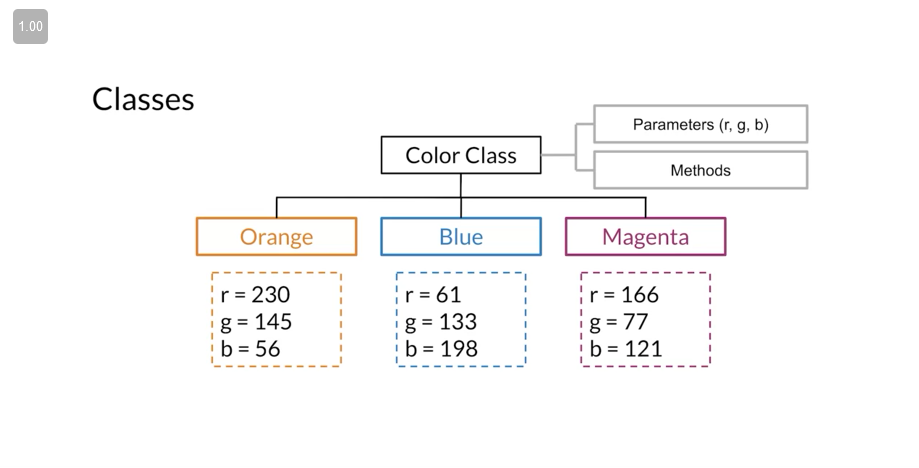

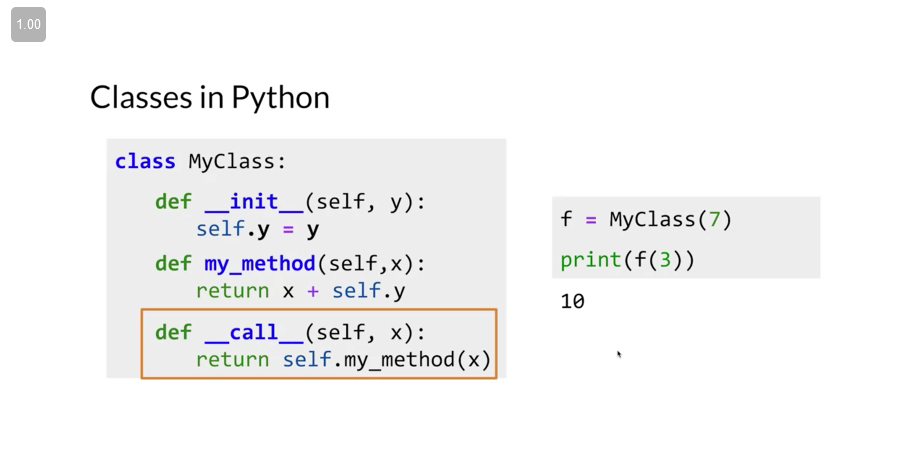

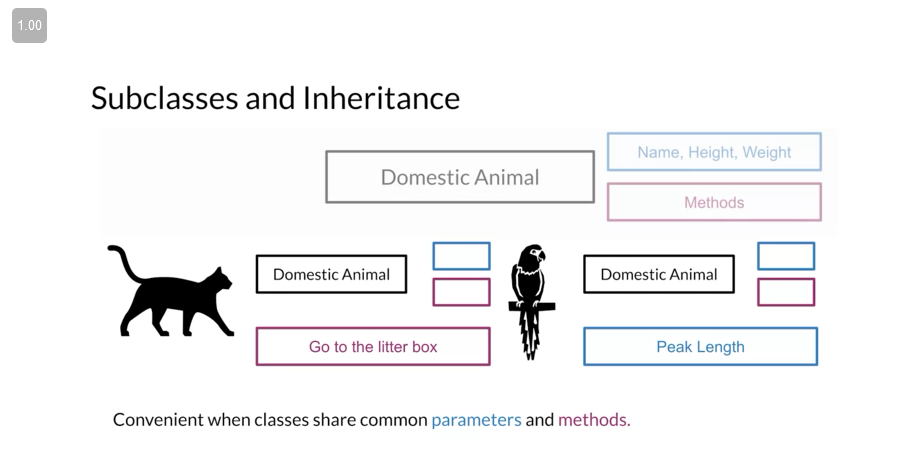

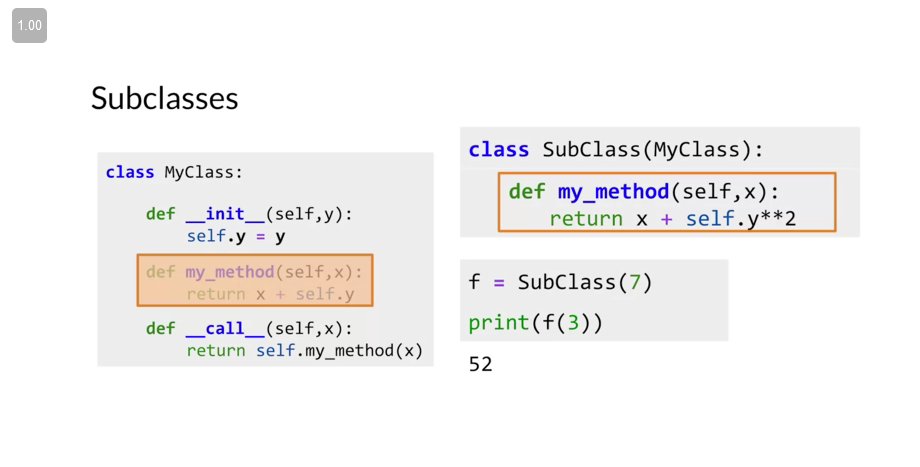

### Summary
- Classes, subclasses, instances and inheritance.

In [18]:
# SECTION DIVIDER

## Classes and Subclasses code

In [19]:
# Parameters, methods, and instances
class My_Class:
  def __init__(self, y, z):
    self.x_1 = y
    self.x_2 = z

  def __call__(self):
    a = self.x_1 - 2*self.x_2
    return a

  def my_method(self, w):
    b = self.x_1 * self.x_2 + w
    return b

  def new_method(self, v):
    result = self.my_method(v)
    return result

instance_g = My_Class(1, 10)
print(f"my_method outputs: {instance_g.my_method(16)}, new_method outputs: {instance_g.new_method(16)}")

my_method outputs: 26, new_method outputs: 26


In [20]:
# Subclasses and inheritance
class sub_c(My_Class):
  def my_method(self):
    b = self.x_1 * self.x_2
    return b

y, z = 1, 10
instance_sub_a = sub_c(y, z)
instance_a = My_Class(y, z)

print(f"Instance of sub_c return: {instance_sub_a.my_method()}, Instance of My_Class returns: {instance_a.my_method(10)}")

Instance of sub_c return: 10, Instance of My_Class returns: 20


In [21]:
# SECTION DIVIDER

## Dense and ReLU Layers
### Outline
- Dense layer in detail
- ReLU function

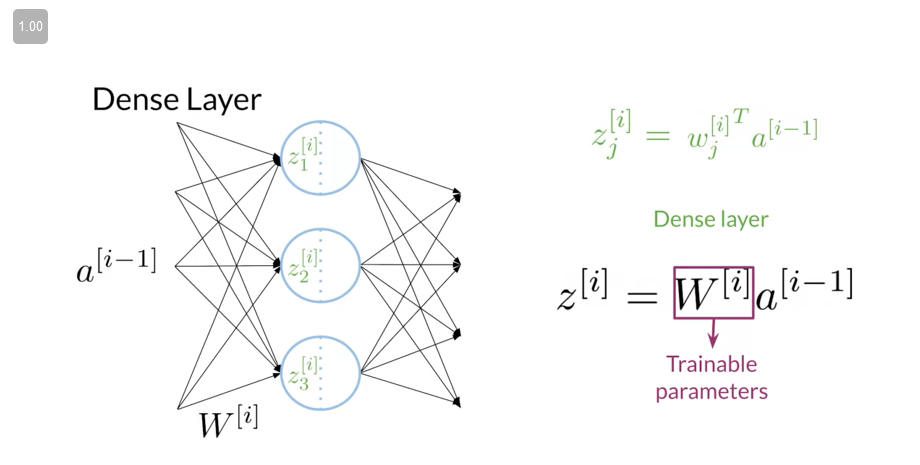

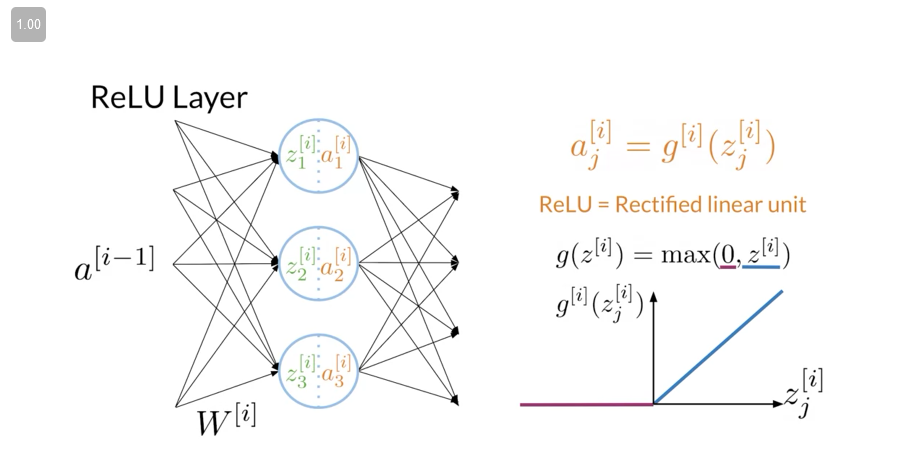

### Summary
- Dense Layer -> $z^{[i]} = W^{[i]}a^{[i-1]}$
- ReLU Layer -> $g(z^{[i]}) = max(0, z^{}[i])$

In [22]:
# SECTION DIVIDER

## Serial Layer
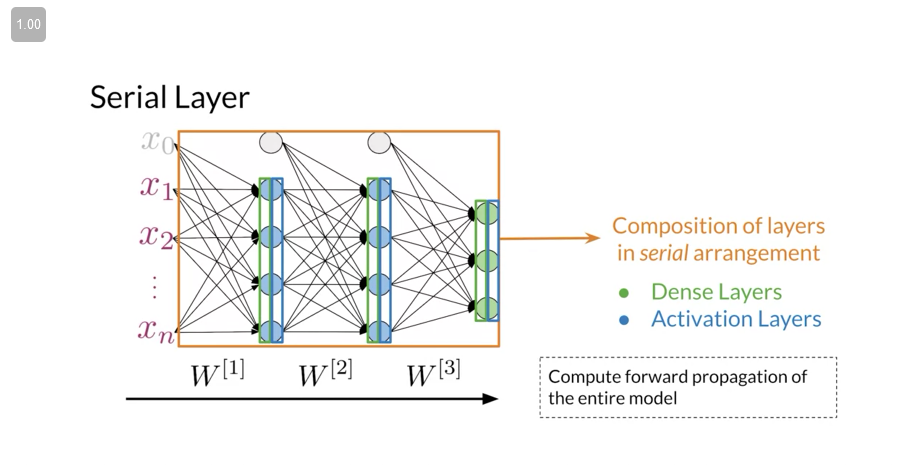

## Other Layers
### Outline
- Embedding layer
- Mean layer

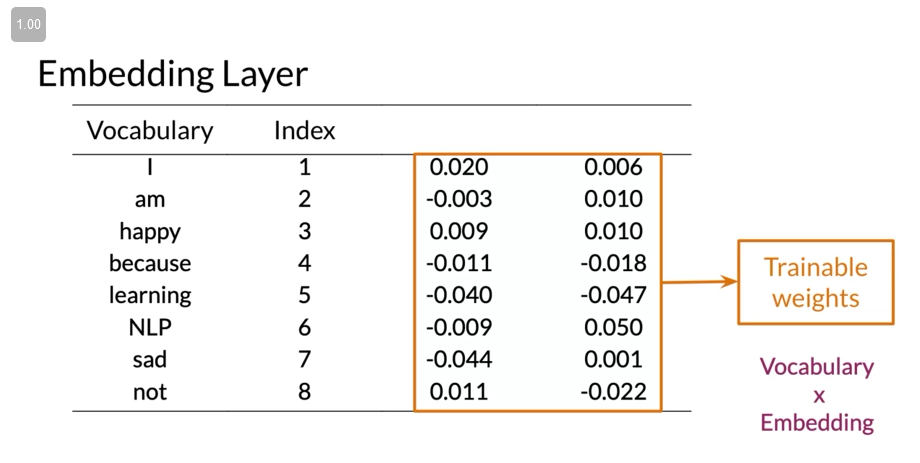

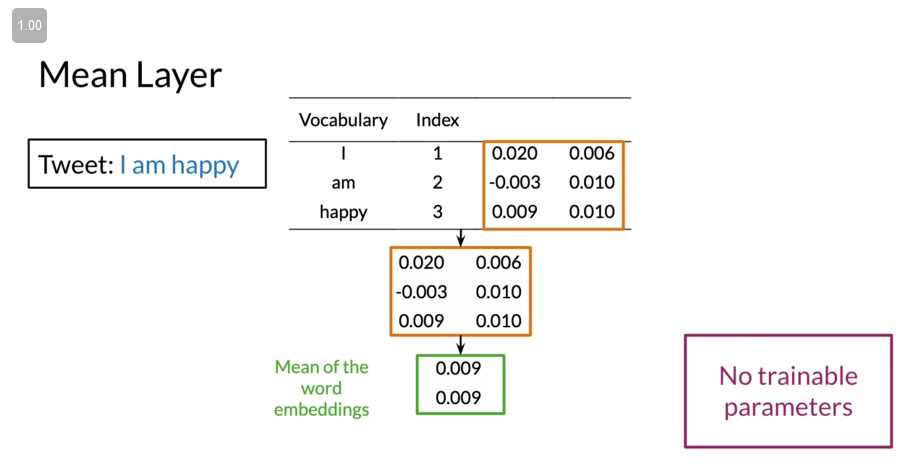

### Summary
- Embedding is trainable using an embedding layer
- Mean layer gives a vector representation

In [23]:
# SECTION DIVIDER

## Training
### Outline
- Computing gradients in trax
- Training using grad()

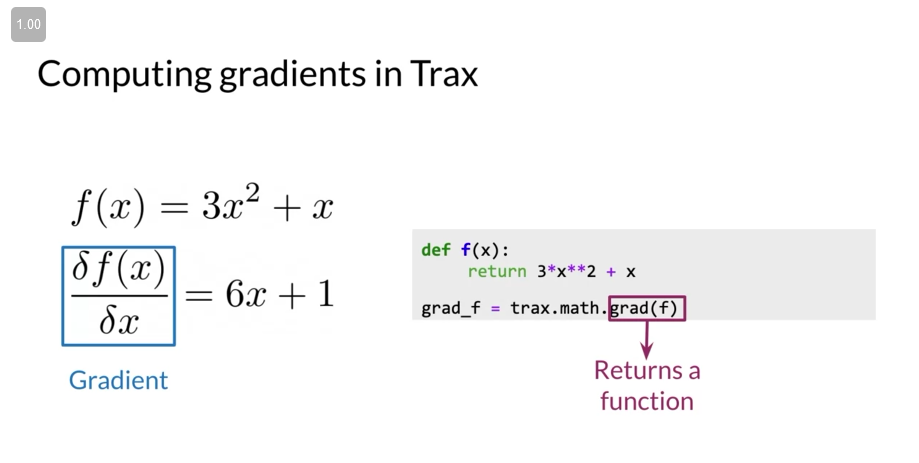

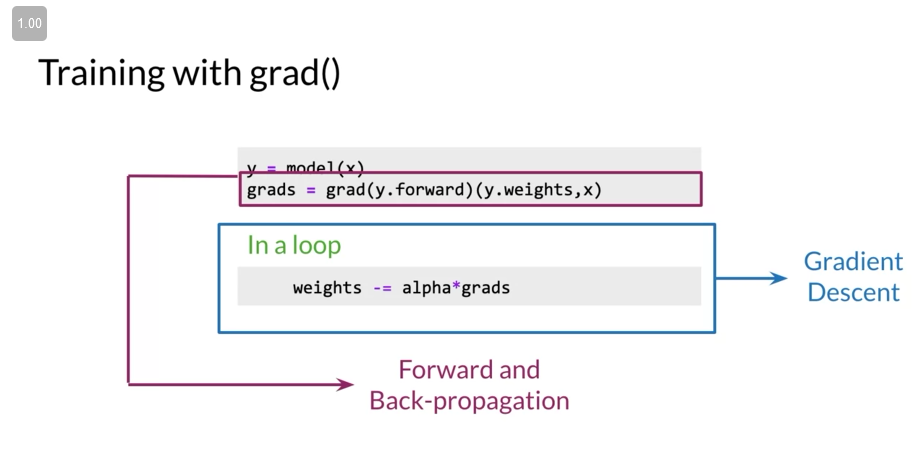

### Summary
- grad() allows much easier training
- Forward and backpropagation in one line!

In [24]:
# SECTION DIVIDER

## Data Generators Code

In [25]:
import random as rnd
import numpy as np

# Example of traversing a list of indexes to create a circular list
a = [1, 2, 3, 4]
b = [0] * 10

a_size = len(a)
b_size = len(b)

lines_index = [*range(a_size)]
index = 0
for i in range(b_size):
  if index >= a_size:
    index = 0

  b[i] = a[lines_index[index]]
  index += 1

print(b)

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2]


In [26]:
# Shuffling the data order
a = [1, 2, 3, 4]
b = []

a_size = len(a)
b_size = 10
lines_index = [*range(a_size)]
print(f"Original order of index: {lines_index}")

rnd.shuffle(lines_index)
print(f"Shuffled order of index: {lines_index}")

print(f"New value order for first batch: {[a[index] for index in lines_index]}")
batch_counter = 1
index = 0
for i in range(b_size):
  if index >= a_size:
    index = 0
    batch_counter += 1
    rnd.shuffle(lines_index)
    print(f"\nShuffled Indexes for Batch No.{batch_counter}: {lines_index}")
    print(f"Values for Batch No.{batch_counter}: {[a[index] for index in lines_index]}")

  b.append(a[lines_index[index]])
  index += 1

print()
print(f"Final value of b: {b}")

Original order of index: [0, 1, 2, 3]
Shuffled order of index: [3, 2, 0, 1]
New value order for first batch: [4, 3, 1, 2]

Shuffled Indexes for Batch No.2: [3, 1, 0, 2]
Values for Batch No.2: [4, 2, 1, 3]

Shuffled Indexes for Batch No.3: [3, 1, 2, 0]
Values for Batch No.3: [4, 2, 3, 1]

Final value of b: [4, 3, 1, 2, 4, 2, 1, 3, 4, 2]


In [27]:
# Data Generator Exercise
def data_generator(batch_size, data_x, data_y, shuffle=True):
  data_lng = len(data_x)
  index_list = [*range(data_lng)]

  if shuffle:
    rnd.shuffle(index_list)

  index = 0
  while True:
    X = [0] * batch_size
    Y = [0] * batch_size

    for i in range(batch_size):
      if index >= data_lng:
        index = 0
        if shuffle:
          rnd.shuffle(index_list)

      X[i] = data_x[index_list[index]]
      Y[i] = data_y[index_list[index]]
      index += 1

    yield((X, Y))

In [28]:
def test_data_generator():
    x = [1, 2, 3, 4]
    y = [xi ** 2 for xi in x]

    generator = data_generator(3, x, y, shuffle=False)

    assert np.allclose(next(generator), ([1, 2, 3], [1, 4, 9])),  "First batch does not match"
    assert np.allclose(next(generator), ([4, 1, 2], [16, 1, 4])), "Second batch does not match"
    assert np.allclose(next(generator), ([3, 4, 1], [9, 16, 1])), "Third batch does not match"
    assert np.allclose(next(generator), ([2, 3, 4], [4, 9, 16])), "Fourth batch does not match"

    print("\033[92mAll tests passed!")

test_data_generator()

All tests passed!


In [29]:
# SECTION DIVIDER

## Sentiment with Deep Neural Networks